In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl

from IPython.display import display, HTML

#import sys
#sys.path.append('../sanode') # Adds higher directory to python modules path.
#import aicsPlot
#aicsPlot.defaultPlotLayout(plotForTalk=False)


In [2]:
def defaultSeabornLayout(plotForTalk=False):
    if plotForTalk:
        plt.style.use('dark_background')
    else:
        plt.style.use('default')

    fontSize = 10
    if plotForTalk: fontSize = 14

    mpl.rcParams['figure.figsize'] = [2.0, 3.0]
    mpl.rcParams['lines.linewidth'] = 1.0
    mpl.rcParams['axes.spines.top'] = False
    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.labelsize'] = fontSize # font size of x/y axes labels (not ticks)
    mpl.rcParams['xtick.labelsize']=fontSize
    mpl.rcParams['ytick.labelsize']=fontSize
    
plotForTalk = False
defaultSeabornLayout(plotForTalk=plotForTalk)

## Plot density of vascular mask

vasc vMaskPercent


,san,head,mid,tail
0,SAN1,41.284844,25.138282,19.008780
1,SAN2,73.059322,50.186379,18.410605
2,SAN3,23.147127,44.007371,45.908017
3,SAN4,29.327682,29.940411,11.672039
4,SAN7,46.570582,46.623831,25.102027


vasc vMaskPercent


,san,head,mid,tail
0,SAN1,21.256964,14.686445,19.008780
1,SAN2,28.156974,19.232181,20.692986
2,SAN3,15.486734,10.825422,12.685823
3,SAN4,23.742720,24.709517,14.501649
4,SAN7,20.694422,16.743263,13.418608


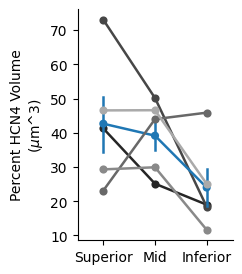

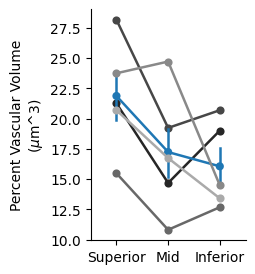

In [9]:
def runDensity(df, yLabel):
    # decide which of head/mid/tail to plot
    theseRegions = ['head', 'mid', 'tail']
    regionList2 = ['Superior', 'Mid', 'Inferior']
    xticks = range(len(theseRegions))
    df = df[df['headMidTail'].isin(theseRegions)]
    yStatName = 'vMaskPercent' # (median, mean)

    # REMOVE SAN7, IT DOES NOT HAVE MID
    #df  = df[ df['SAN'] != 'SAN7']

    #print(df[['SAN', 'headMidTail', yStatName]])

    fig, ax = plt.subplots(1)

    sns.pointplot(ax=ax, x='headMidTail', y=yStatName, hue='SAN', color='#aaaaaa', data=df)

    # mean+/- sem
    sns.pointplot(ax=ax, x='headMidTail', y=yStatName, scatter_kws={"s": 2}, 
                      markers=['o'], markercolor=['r'],
                      #markeredgewidth=10.0,
                      ci=68,
                      data=df)

    #ax.set_ylim([10.1, 29.9]) #vasc
    #ax.set_ylim([0, 30]) #vasc
    ax.set_ylabel(yLabel)
    ax.set_xlabel('')
    #plt.xticks([0, 1], regionList2)
    plt.xticks(xticks, regionList2)
    ax.get_legend().remove()

    prismDictList = []
    sanList = df['SAN'].unique()
    for san in sanList:
        prismDict = {'san': san}
        dfTmp = df[df['SAN']==san]
        #regionList = dfTmp['headMidTail'].unique()
        #display(HTML(dfTmp.to_html()))
        for region in theseRegions:
            value = dfTmp[dfTmp['headMidTail'] == region][yStatName]
            value = value.values[0]
            #print(value)
            prismDict[region] = value
            #prismDict['value'] = 999
        prismDictList.append(prismDict)
    #print(prismDictList)

    print(doChannel, yStatName)
    dfOut = pd.DataFrame(prismDictList)
    display(HTML(dfOut.to_html()))

#
# plot the density of a mask (e.g. vascular mask)
path = 'Density-Result-ch1.csv'
yLabel = 'Percent HCN4 Volume\n($\mu$m^3)'
df = pd.read_csv(path)
runDensity(df, yLabel)

path = 'Density-Result-ch2.csv'
yLabel = 'Percent Vascular Volume\n($\mu$m^3)'
df = pd.read_csv(path)
runDensity(df, yLabel)



<AxesSubplot:xlabel='headMidTail', ylabel='vMaskPercent'>

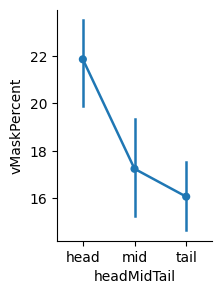

In [10]:
# if I drop hue, I get mean +/- some error (not sure which error, Std or SEM?)
# what does ci=68 do?
fig, ax = plt.subplots(1)
sns.pointplot(ax=ax, x='headMidTail', y=yStatName, scatter_kws={"s": 2}, ci=68, data=df)


## Plot the mean/median of HCN4 pixels to closest vasculature

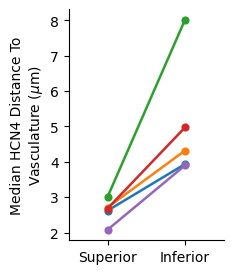

In [11]:
path = 'hcn4-Distance-Result.csv'
df = pd.read_csv(path)

# decide which of head/mid/tail to plot
theseRegions = ['head', 'tail']
df2 = df[df['headMidTail'].isin(theseRegions)]
yStatName = 'median' # (median, mean)

fig, ax = plt.subplots(1)

# estimator=numpy.median
#axSeaborn = sns.catplot(x='headMidTail', y=yStatName, hue='SAN', kind="point", data=df)
axSeaborn = sns.pointplot(ax=ax, x='headMidTail', y=yStatName, hue='SAN', kind="point", data=df2)

#ax.set_ylim([1.1, 8.9]) # for median
yStatLabel = yStatName[0].upper() + yStatName[1:]
yLabel = f'{yStatLabel} HCN4 Distance To\nVasculature ($\mu$m)'
ax.set_ylabel(yLabel)
ax.set_xlabel('')
regionList2 = ['Superior', 'Inferior']
plt.xticks([0, 1], regionList2)
ax.get_legend().remove()

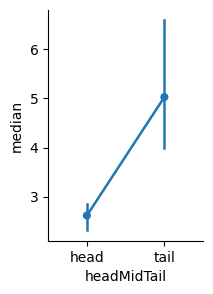

In [12]:
fig, ax = plt.subplots(1)
axSeaborn = sns.pointplot(ax=ax, x='headMidTail', y=yStatName, data=df2)


In [13]:
# load hcn4Dist.csv .. this takes a few seconds
path = 'hcn4Dist.csv'
dfDist = pd.read_csv(path)

FileNotFoundError: [Errno 2] No such file or directory: 'hcn4Dist.csv'

In [14]:

sanStr = 'SAN2'
regionList = ['tail', 'head'] # to get logical order head-tail in plot

df2 = dfDist[ dfDist['SAN'] == sanStr]
df2 = df2[ df2['headMidTail'].isin(regionList) ]

fig, ax = plt.subplots(1)

split = False
linewidth = 2
ax = sns.violinplot(ax=ax, x="SAN", y="hcn4DistToVasc", hue='headMidTail', linewidth=linewidth, split=split, data=df2)

ax.set_ylabel('HCN4 Distance To\nVasculature ($\mu$m)')
ax.set_xlabel('')
ax.margins(x=0.1, y=0.1)
regionList2 = ['Superior', 'Inferior']
plt.xticks([-0.2, .2], regionList2)

plt.legend(frameon=False)
ax.get_legend().remove()

NameError: name 'dfDist' is not defined